In [92]:
import matplotlib.pyplot as plt
import numpy as np

"""
In this example, J(theta) = theta^2, where theta is a real variable
"""
def J(theta):
    return theta ** 2


"""
Return the gradient of the J function at the current theta
"""
def g(theta): 
    return 2 * theta


def gradient_descent_AdaGrad(theta, alpha = 0.01, n_iter = 20):
    r = 0
    X = [theta]
    Y = [J(theta)]
    for t in range(n_iter):
        r       = r + g(theta) * g(theta)
        alpha_t = alpha / np.sqrt(r)
        theta   = theta - alpha_t * g(theta)
        X.append(theta)
        Y.append(J(theta))
    return X, Y 


def gradient_descent_RMSProp(theta, alpha = 0.01, n_iter = 20, rho = 0.9):
    r = 0
    X = [theta]
    Y = [J(theta)]
    for t in range(n_iter):
        r       = rho * r + (1 - rho) * g(theta) * g(theta)
        alpha_t = alpha / np.sqrt(r)
        theta   = theta - alpha_t * g(theta)
        X.append(theta)
        Y.append(J(theta))
    return X, Y 


def adam(theta, alpha = 0.01, n_iter = 20, rho_1 = 0.9, rho_2 = 0.999):
    s = 0 # velocity variable in momentum
    r = 0 # a variable to store expoentially delayed summation of squared gradients
    delta = 1e-8 # a close-to-zero constant
    X = [theta]
    Y = [J(theta)]
    for t in range(n_iter): # t refers to index of itereation
        s       = rho_1 * s + (1 - rho_1) * g(theta)   # momentum step 
        r       = rho_2 * r + (1 - rho_2) * g(theta) * g(theta) # RMSProp step
        s_hat   = s / (1 - rho_1 ** (t+1))  # bias correction
        r_hat   = r / (1 - rho_2 ** (t+1))  # bias correction
        alpha_t = alpha / np.sqrt(r_hat + delta) # RMSProp step to calculate an adpative learning rate
        v       = -1 * alpha_t * s_hat  # calculate velocity
        theta   = theta + v   # update theta vased on velocity
        X.append(theta)
        Y.append(J(theta))
    return X, Y 


def gradient_descent(theta, alpha = 0.01, n_iter = 20):
    X = [theta]
    Y = [J(theta)]
    v = 0
    for iteration in range(n_iter):
        theta = theta - alpha * g(theta)
        X.append(theta)
        Y.append(J(theta))
    return X, Y 


def gradient_descent_momentum(theta, alpha = 0.01, n_iter = 20, eta = 0.90):
    X = [theta]
    Y = [J(theta)]
    v = 0
    for iteration in range(n_iter):
        v = eta * v - alpha * g(theta)
        theta = theta + v
        X.append(theta)
        Y.append(J(theta))
    return X, Y 

def gradient_descent_nesterov_momentum(theta, alpha = 0.01, n_iter = 20, eta = 0.9):
    X = [theta]
    Y = [J(theta)]
    v = 0
    for iteration in range(n_iter):
        v = eta * v - alpha * g(theta + eta * v)
        theta = theta + v
        X.append(theta)
        Y.append(J(theta))
    return X, Y 


def plot_results(X, Y, ax):
    # 100 linearly spaced numbers
    theta = np.linspace(-10, 10,100)

    # setting the axes at the centre
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$J(\theta) = \theta^2$')
    ax.plot(theta, J(theta), 'r')
    ax.plot(X, Y, '-b')
    ax.scatter(X, Y, s=80, facecolors='none', edgecolors='r')


<p> We have the following obserbsations based on the the results shown below:  </p>
    
    
 <ul>
  <li>Gradient descent may bounce around the global optimum if the learning rate is too high. </li>
  <li>Gradient descent with AdaGrad will gradually reduce the learning rate with more iterations, but may reduce to a nearly zero value too rapidly before it reaches the global optimum</li>
  <li>Gradient descent with RMSProp will gradually reduce the learning rate with more iterations, but it will not reduce the learning rate as aggresively as AdaGrad. </li>
  <li>The advantages of gradient descent with momentum and gradient descent with Nesterov momentum are not obvoius in this simple example. A good example for them is shown in the following article: <a href="https://ruder.io/optimizing-gradient-descent/index.html#adagrad">An overview of gradient descent optimization algorithms</a> </li>
</ul>   
    

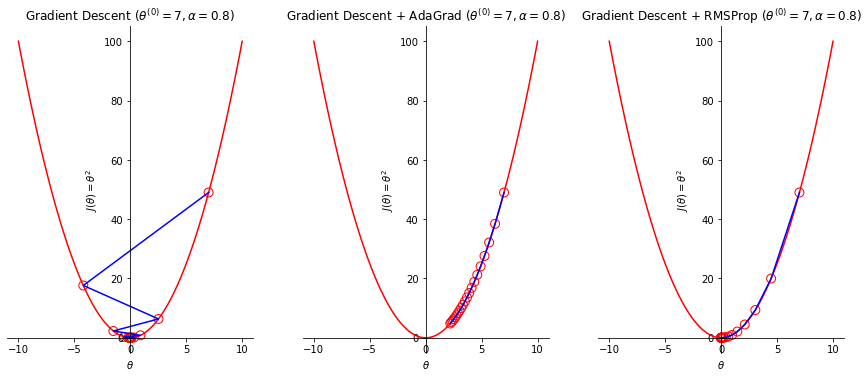

In [93]:
fig, (ax1, ax2, ax3)     = plt.subplots(1, 3, figsize=(15, 6))
theta_0                  = 7
X, Y                     = gradient_descent(theta_0, alpha = 0.8)
plot_results(X, Y, ax1)
ax1.set_title(r'Gradient Descent ($\theta^{(0)} = 7, \alpha = 0.8$)')
X, Y                     = gradient_descent_AdaGrad(theta_0, alpha = 0.8)
plot_results(X, Y, ax2)
ax2.set_title(r'Gradient Descent + AdaGrad ($\theta^{(0)} = 7, \alpha = 0.8$)')
X, Y                     = gradient_descent_RMSProp(theta_0, alpha = 0.8)
plot_results(X, Y, ax3)
ax3.set_title(r'Gradient Descent + RMSProp ($\theta^{(0)} = 7, \alpha = 0.8$)')
plt.show()

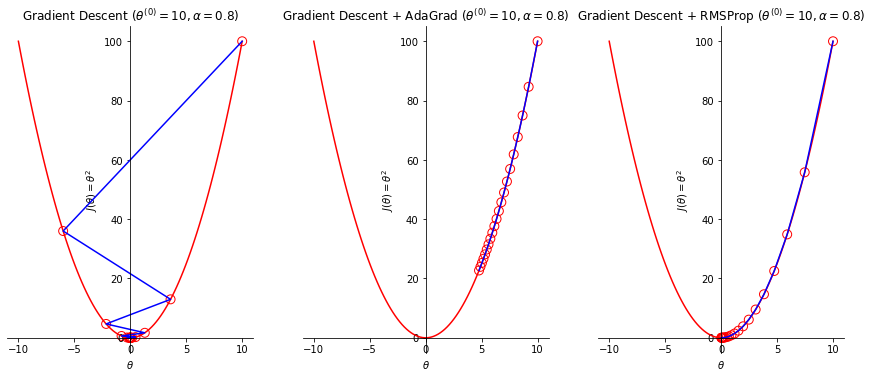

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
theta_0  = 10
X, Y     = gradient_descent(theta_0, alpha = 0.8)
plot_results(X, Y, ax1)
ax1.set_title(r'Gradient Descent ($\theta^{(0)} = 10, \alpha = 0.8$)')
X, Y     = gradient_descent_AdaGrad(theta_0, alpha = 0.8)
plot_results(X, Y, ax2)
ax2.set_title(r'Gradient Descent + AdaGrad ($\theta^{(0)} = 10, \alpha = 0.8$)')
X, Y     = gradient_descent_RMSProp(theta_0, alpha = 0.8)
plot_results(X, Y, ax3)
ax3.set_title(r'Gradient Descent + RMSProp ($\theta^{(0)} = 10, \alpha = 0.8$)')
plt.show()

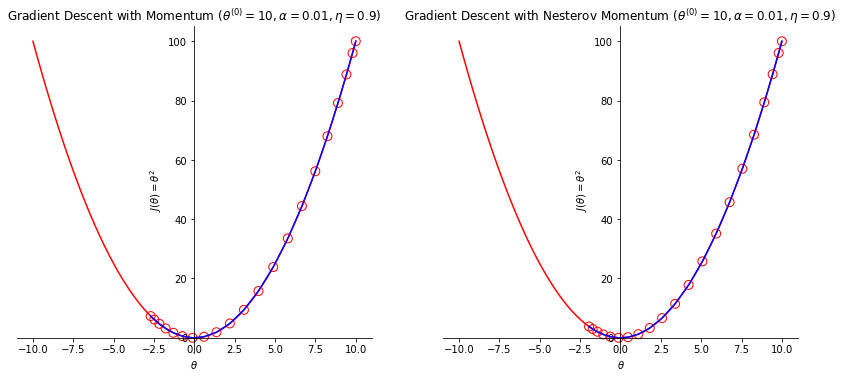

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
theta_0  = 10
X, Y     = gradient_descent_momentum(theta_0, alpha = 0.01)
plot_results(X, Y, ax1)
ax1.set_title(r'Gradient Descent with Momentum ($\theta^{(0)} = 10, \alpha = 0.01, \eta = 0.9$)')
X, Y     = gradient_descent_nesterov_momentum(theta_0, alpha = 0.01)
plot_results(X, Y, ax2)
ax2.set_title(r'Gradient Descent with Nesterov Momentum ($\theta^{(0)} = 10, \alpha = 0.01, \eta = 0.9$)')
plt.show()

Text(0.5, 1.0, 'Adam ($\\theta^{(0)} = 7, \\alpha = 0.8, \\rho_1 = 0.9, \\rho_2 = 0.999$)')

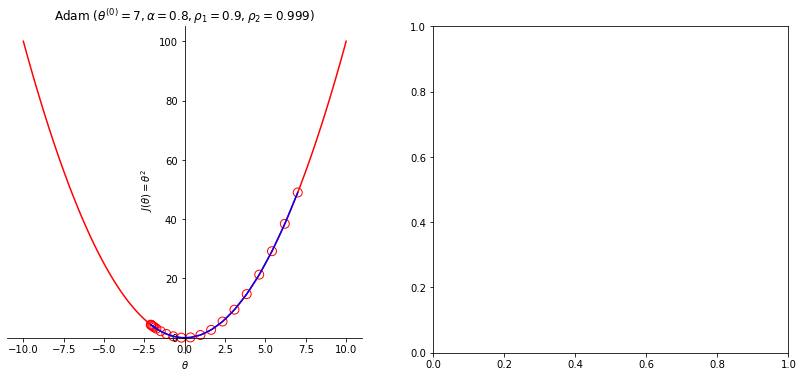

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
theta_0         = 7
X, Y            = adam(theta_0, alpha = 0.8)
plot_results(X, Y, ax1)
ax1.set_title(r'Adam ($\theta^{(0)} = 7, \alpha = 0.8, \rho_1 = 0.9, \rho_2 = 0.999$)')